In [2]:
# Import necessary libraries for data manipulation and machine learning
import pandas as pd # Data manipulation
import numpy as np # Numerical operations
from datetime import datetime # Date and time handling

# Import machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Import preprocessing and evaluation tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.pipeline import Pipeline

In [3]:
# Set Pandas option to display all columns in DataFrames (useful for data exploration)
pd.set_option("display.max_columns", None)

In [4]:
# Load the dataset from a CSV file into a Pandas DataFrame
data = pd.read_csv("FradulentInsuranceClaim Data.csv")

In [5]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [6]:
# Check the dimensions of the dataset (number of rows and columns)
data.shape

(1000, 40)

In [7]:
# Display information about the dataset, including data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
# Count the number of unique values in each column of the dataset
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [9]:
# the time difference in months between the "policy bind date" and the "incident date" for each row in the dataset.
bind_to_incident = []
for i in range(data.shape[0]) :
    # Extract 'policy_bind_date' and 'incident_date' strings from the DataFrame
    datestring1 = data["policy_bind_date"][i]
    datestring2 = data["incident_date"][i]
    # Convert date strings to datetime objects using the specified format ('%d-%m-%Y')
    dt1 = datetime.strptime(datestring1, '%d-%m-%Y')
    dt2 = datetime.strptime(datestring2, '%d-%m-%Y')
    # Calculate the time difference in months and append to the 'bind_to_incident' list
    bind_to_incident.append(((dt2.year - dt1.year)*365 + (dt2.month - dt1.month)*30 + (dt2.day - dt1.day))/30)

In [10]:
# Remove unnecessary columns from the dataset
data = data.drop(["policy_number","_c39","incident_location","insured_zip","auto_year","policy_bind_date","incident_date"], axis=1)
data.shape

(1000, 33)

In [11]:
# Add a new column 'bind_to_incident' to the dataset to store the time difference in months
data["bind_to_incident"] = bind_to_incident
data.shape

(1000, 34)

In [12]:
# Generate summary statistics for the dataset to understand its distribution
data.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,bind_to_incident
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,157.906567
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,89.486928
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,-0.666667
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,82.733333
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,155.950000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,235.525000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,305.500000


1. Skewness measures the asymmetry of the distribution of data. A positive skewness value indicates a right-skewed distribution, while a negative value indicates a left-skewed distribution.
2. Kurtosis measures the "tailedness" of the distribution. High positive kurtosis indicates heavy tails, while negative kurtosis indicates light tails compared to a normal distribution.
3. These statistics provide insights into the shape of the distribution of the  feature, which can help in understanding its data characteristics.

In [13]:
# Calculate and print the skewness and kurtosis of the 'months_as_customer' column
print(f"Skewnes : {data['months_as_customer'].skew()}, Kurtosis : {data['months_as_customer'].kurtosis()}")

Skewnes : 0.3621768477780205, Kurtosis : -0.48542806739146993


In [14]:
import matplotlib.pyplot as plt # Matplotlib for basic plotting
import seaborn as sns # Seaborn for statistical data visualization

/tmp/ipykernel_3647/2480014195.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["months_as_customer"], hist=True, kde=True)


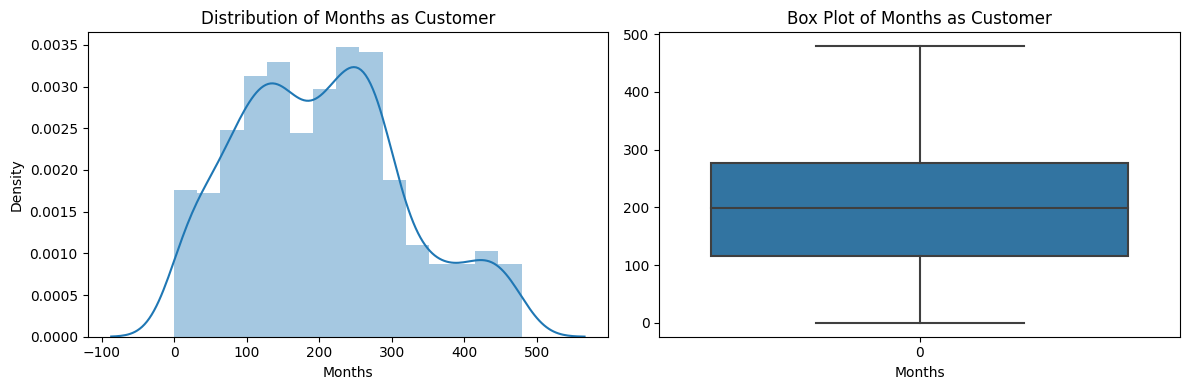

In [15]:
# Create subplots to visualize the distribution and box plot of 'months_as_customer'
plt.figure(figsize=(12,4))
# Create the first subplot for the distribution plot
plt.subplot(1,2,1)
sns.distplot(data["months_as_customer"], hist=True, kde=True)
plt.title("Distribution of Months as Customer")
plt.xlabel("Months")
plt.ylabel("Density")

# Create the second subplot for the box plot
plt.subplot(1,2,2)
sns.boxplot(data["months_as_customer"])
plt.title("Box Plot of Months as Customer")
plt.xlabel("Months")

# Display the subplots
plt.tight_layout()
plt.show()

In [16]:
# Calculate and print the skewness and kurtosis of the 'age' column
print(f"Skewnes : {data['age'].skew()}, Kurtosis : {data['age'].kurtosis()}")

Skewnes : 0.47898804709224163, Kurtosis : -0.26025501504003934


/tmp/ipykernel_3647/3258331211.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["age"], hist=True, kde=True)


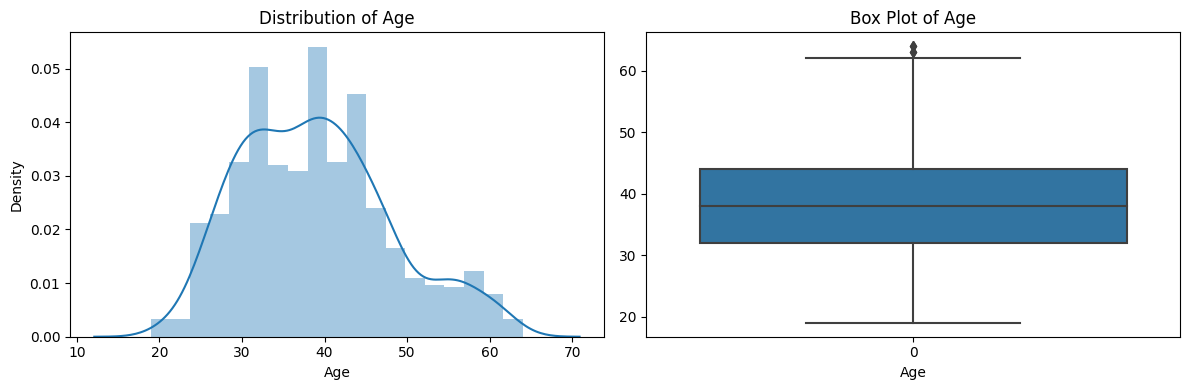

In [17]:
# Create subplots to visualize the distribution and box plot of 'age'
plt.figure(figsize=(12, 4))

# Create the first subplot for the distribution plot
plt.subplot(1, 2, 1)
sns.distplot(data["age"], hist=True, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Density")

# Create the second subplot for the box plot
plt.subplot(1, 2, 2)
sns.boxplot(data["age"])
plt.title("Box Plot of Age")
plt.xlabel("Age")

# Display the subplots
plt.tight_layout()
plt.show()

In [18]:
# Calculate and print the skewness and kurtosis of the 'policy_annual_premium' column
print(f"Skewnes : {data['policy_annual_premium'].skew()}, Kurtosis : {data['policy_annual_premium'].kurtosis()}")

Skewnes : 0.004401994526610823, Kurtosis : 0.0738894402077599


/tmp/ipykernel_3647/2153025410.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["policy_annual_premium"], hist=True, kde=True)


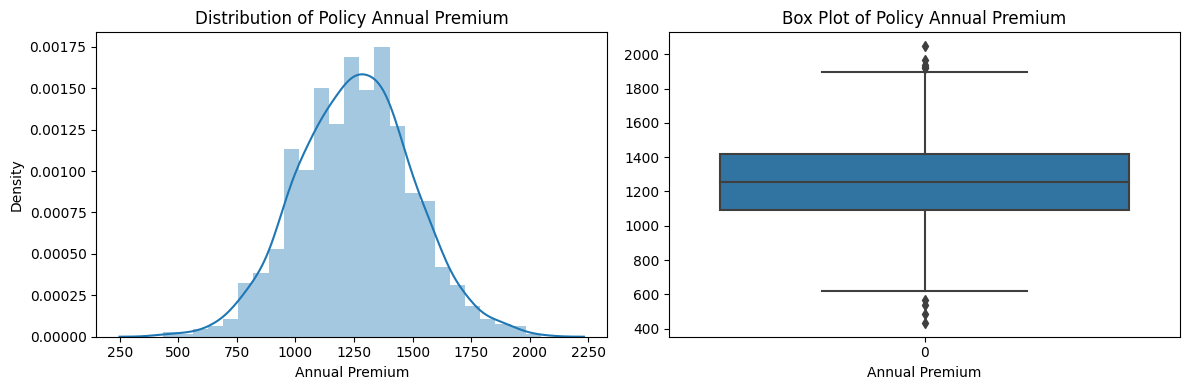

In [19]:
# Create subplots to visualize the distribution and box plot of 'policy_annual_premium'
plt.figure(figsize=(12, 4))

# Create the first subplot for the distribution plot
plt.subplot(1, 2, 1)
sns.distplot(data["policy_annual_premium"], hist=True, kde=True)
plt.title("Distribution of Policy Annual Premium")
plt.xlabel("Annual Premium")
plt.ylabel("Density")

# Create the second subplot for the box plot
plt.subplot(1, 2, 2)
sns.boxplot(data["policy_annual_premium"])
plt.title("Box Plot of Policy Annual Premium")
plt.xlabel("Annual Premium")

# Display the subplots
plt.tight_layout()
plt.show()

In [20]:
# Calculate and print the skewness and kurtosis of the 'capital-gains' column
print(f"Skewnes : {data['capital-gains'].skew()}, Kurtosis : {data['capital-gains'].kurtosis()}")

Skewnes : 0.4788502295807907, Kurtosis : -1.276703510816485


/tmp/ipykernel_3647/3215996120.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["capital-gains"], hist=True, kde=True)


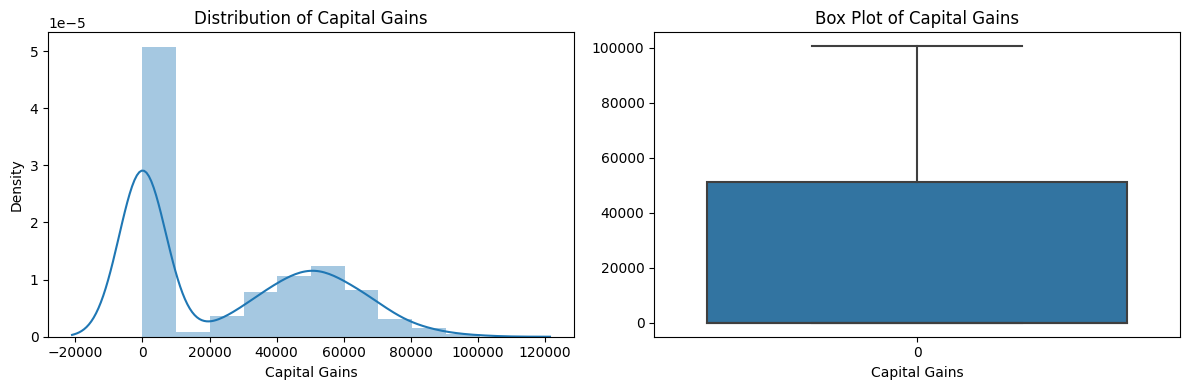

In [21]:
# Create subplots to visualize the distribution and box plot of 'capital-gains'
plt.figure(figsize=(12, 4))

# Create the first subplot for the distribution plot
plt.subplot(1, 2, 1)
sns.distplot(data["capital-gains"], hist=True, kde=True)
plt.title("Distribution of Capital Gains")
plt.xlabel("Capital Gains")
plt.ylabel("Density")

# Create the second subplot for the box plot
plt.subplot(1, 2, 2)
sns.boxplot(data["capital-gains"])
plt.title("Box Plot of Capital Gains")
plt.xlabel("Capital Gains")

# Display the subplots
plt.tight_layout()
plt.show()

In [22]:
# Calculate and print the skewness and kurtosis of the 'capital-loss' column
print(f"Skewnes : {data['capital-loss'].skew()}, Kurtosis : {data['capital-loss'].kurtosis()}")

Skewnes : -0.39147194299389343, Kurtosis : -1.3138745001493803


/tmp/ipykernel_3647/3841728785.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["capital-loss"], hist=True, kde=True)


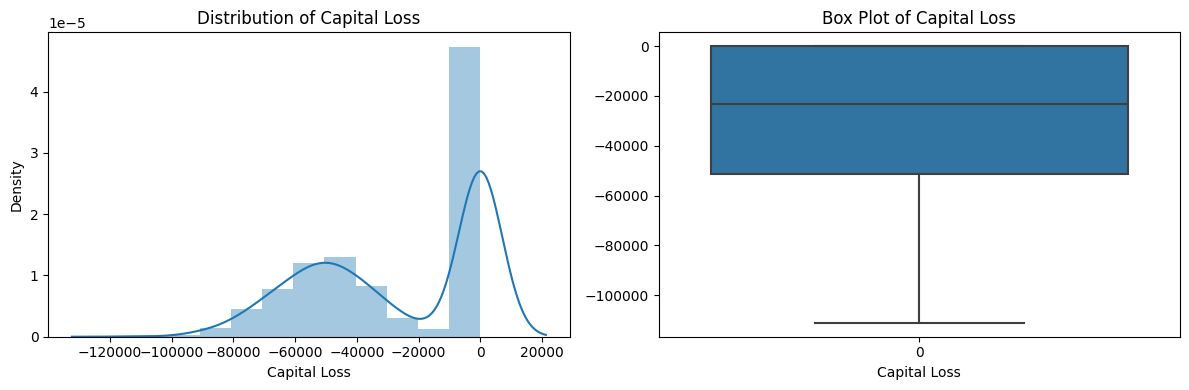

In [23]:
# Create subplots to visualize the distribution and box plot of 'capital-loss'
plt.figure(figsize=(12, 4))

# Create the first subplot for the distribution plot
plt.subplot(1, 2, 1)
sns.distplot(data["capital-loss"], hist=True, kde=True)
plt.title("Distribution of Capital Loss")
plt.xlabel("Capital Loss")
plt.ylabel("Density")

# Create the second subplot for the box plot
plt.subplot(1, 2, 2)
sns.boxplot(data["capital-loss"])
plt.title("Box Plot of Capital Loss")
plt.xlabel("Capital Loss")

# Display the subplots
plt.tight_layout()
plt.show()

In [24]:
# Calculate and print the skewness and kurtosis of the 'total_claim_amount' column
print(f"Skewnes : {data['total_claim_amount'].skew()}, Kurtosis : {data['total_claim_amount'].kurtosis()}")

Skewnes : -0.594581988510234, Kurtosis : -0.45408142669809326


/tmp/ipykernel_3647/2449491646.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["total_claim_amount"], hist=True, kde=True)


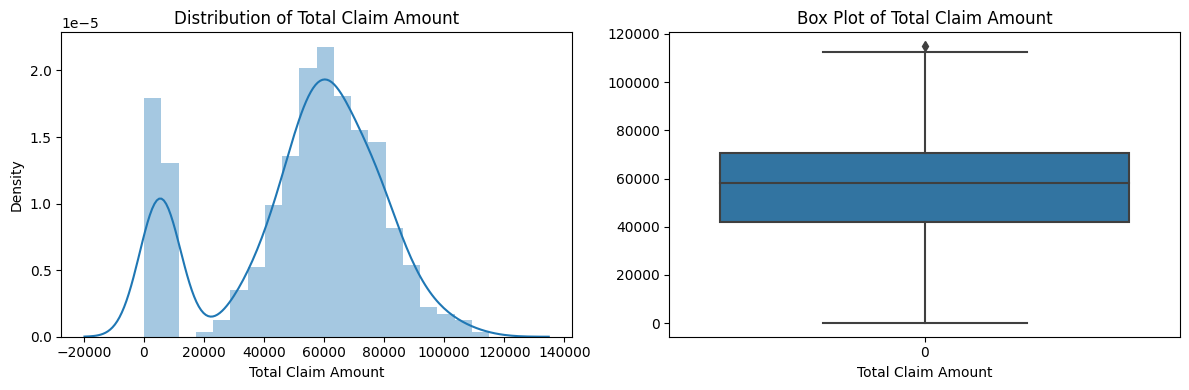

In [25]:
# Create subplots to visualize the distribution and box plot of 'total_claim_amount'
plt.figure(figsize=(12, 4))

# Create the first subplot for the distribution plot
plt.subplot(1, 2, 1)
sns.distplot(data["total_claim_amount"], hist=True, kde=True)
plt.title("Distribution of Total Claim Amount")
plt.xlabel("Total Claim Amount")
plt.ylabel("Density")

# Create the second subplot for the box plot
plt.subplot(1, 2, 2)
sns.boxplot(data["total_claim_amount"])
plt.title("Box Plot of Total Claim Amount")
plt.xlabel("Total Claim Amount")

# Display the subplots
plt.tight_layout()
plt.show()

In [26]:
# Calculate and print the skewness and kurtosis of the 'injury_claim' column
print(f"Skewnes : {data['injury_claim'].skew()}, Kurtosis : {data['injury_claim'].kurtosis()}")

Skewnes : 0.26481087847181833, Kurtosis : -0.7630870610902973


/tmp/ipykernel_3647/249584571.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["injury_claim"], hist=True, kde=True)


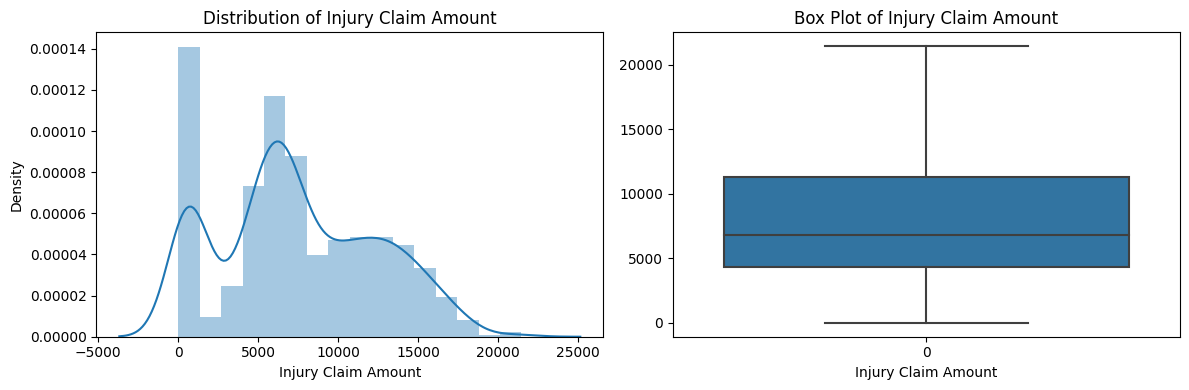

In [27]:
# Create subplots to visualize the distribution and box plot of 'injury_claim'
plt.figure(figsize=(12, 4))

# Create the first subplot for the distribution plot
plt.subplot(1, 2, 1)
sns.distplot(data["injury_claim"], hist=True, kde=True)
plt.title("Distribution of Injury Claim Amount")
plt.xlabel("Injury Claim Amount")
plt.ylabel("Density")

# Create the second subplot for the box plot
plt.subplot(1, 2, 2)
sns.boxplot(data["injury_claim"])
plt.title("Box Plot of Injury Claim Amount")
plt.xlabel("Injury Claim Amount")

# Display the subplots
plt.tight_layout()
plt.show()

In [28]:
# Calculate and print the skewness and kurtosis of the 'property_claim' column
print(f"Skewnes : {data['property_claim'].skew()}, Kurtosis : {data['property_claim'].kurtosis()}")

Skewnes : 0.3781687764308289, Kurtosis : -0.37638631173052817


/tmp/ipykernel_3647/258010006.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["property_claim"], hist=True, kde=True)


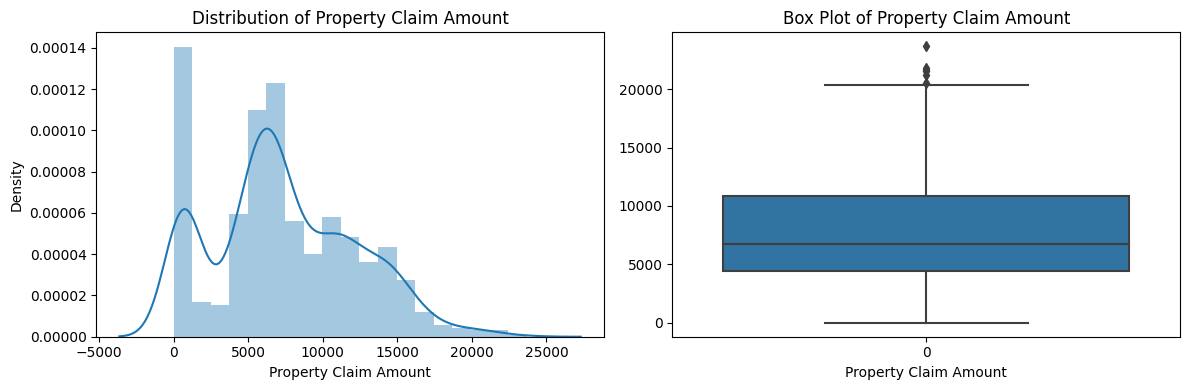

In [29]:
# Create subplots to visualize the distribution and box plot of 'property_claim'
plt.figure(figsize=(12, 4))

# Create the first subplot for the distribution plot
plt.subplot(1, 2, 1)
sns.distplot(data["property_claim"], hist=True, kde=True)
plt.title("Distribution of Property Claim Amount")
plt.xlabel("Property Claim Amount")
plt.ylabel("Density")

# Create the second subplot for the box plot
plt.subplot(1, 2, 2)
sns.boxplot(data["property_claim"])
plt.title("Box Plot of Property Claim Amount")
plt.xlabel("Property Claim Amount")

# Display the subplots
plt.tight_layout()
plt.show()

In [30]:
# Calculate and print the skewness and kurtosis of the 'vehicle_claim' column
print(f"Skewnes : {data['vehicle_claim'].skew()}, Kurtosis : {data['vehicle_claim'].kurtosis()}")

Skewnes : -0.6210979312228687, Kurtosis : -0.44657292312114905


/tmp/ipykernel_3647/3326511694.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["vehicle_claim"], hist=True, kde=True)


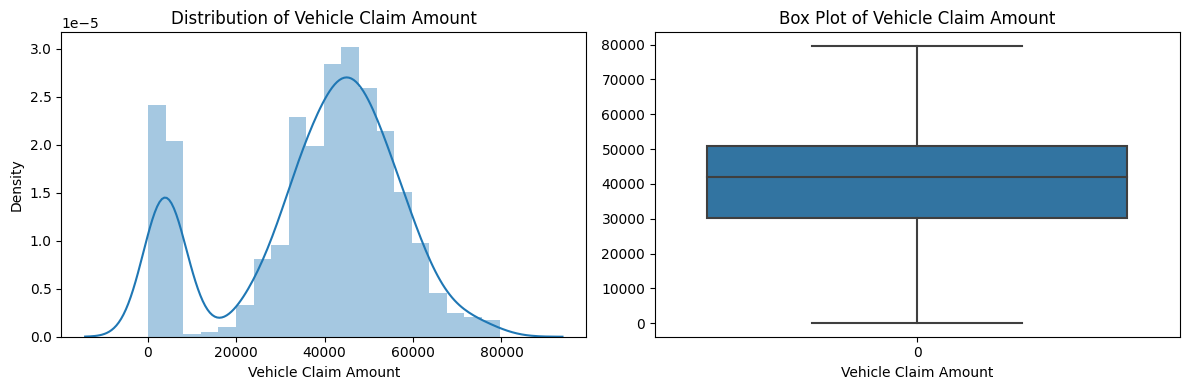

In [31]:
# Create subplots to visualize the distribution and box plot of 'vehicle_claim'
plt.figure(figsize=(12, 4))

# Create the first subplot for the distribution plot
plt.subplot(1, 2, 1)
sns.distplot(data["vehicle_claim"], hist=True, kde=True)
plt.title("Distribution of Vehicle Claim Amount")
plt.xlabel("Vehicle Claim Amount")
plt.ylabel("Density")

# Create the second subplot for the box plot
plt.subplot(1, 2, 2)
sns.boxplot(data["vehicle_claim"])
plt.title("Box Plot of Vehicle Claim Amount")
plt.xlabel("Vehicle Claim Amount")

# Display the subplots
plt.tight_layout()
plt.show()

In [32]:
# Calculate and print the skewness and kurtosis of the 'bind_to_incident' column
print(f"Skewnes : {data['bind_to_incident'].skew()}, Kurtosis : {data['bind_to_incident'].kurtosis()}")

Skewnes : -0.05274303636140369, Kurtosis : -1.20280745167096


/tmp/ipykernel_3647/1323833130.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["bind_to_incident"], hist=True, kde=True)


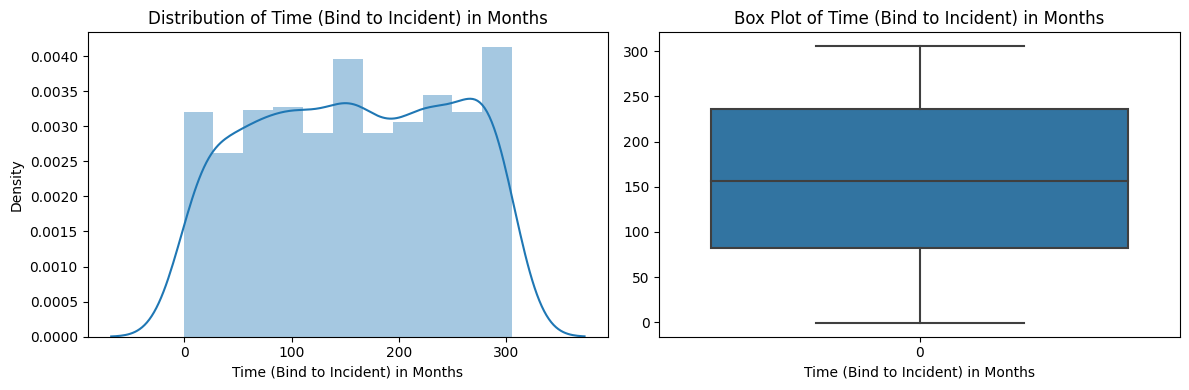

In [33]:
# Create subplots to visualize the distribution and box plot of 'bind_to_incident'
plt.figure(figsize=(12, 4))

# Create the first subplot for the distribution plot
plt.subplot(1, 2, 1)
sns.distplot(data["bind_to_incident"], hist=True, kde=True)
plt.title("Distribution of Time (Bind to Incident) in Months")
plt.xlabel("Time (Bind to Incident) in Months")
plt.ylabel("Density")

# Create the second subplot for the box plot
plt.subplot(1, 2, 2)
sns.boxplot(data["bind_to_incident"])
plt.title("Box Plot of Time (Bind to Incident) in Months")
plt.xlabel("Time (Bind to Incident) in Months")

# Display the subplots
plt.tight_layout()
plt.show()

In [34]:
# Calculate the correlation matrix for selected numerical columns
data[["months_as_customer","age","policy_annual_premium","capital-gains","capital-loss","total_claim_amount","injury_claim",
    "property_claim","vehicle_claim","bind_to_incident"]].corr()

,months_as_customer,age,policy_annual_premium,capital-gains,capital-loss,total_claim_amount,injury_claim,property_claim,vehicle_claim,bind_to_incident
months_as_customer,1.000000,0.922098,0.005018,0.006399,0.020209,0.062108,0.065329,0.034940,0.061013,0.047937
age,0.922098,1.000000,0.014404,-0.007075,0.007368,0.069863,0.075522,0.060898,0.062588,0.036753
policy_annual_premium,0.005018,0.014404,1.000000,-0.013738,0.023547,0.009094,-0.017633,-0.011654,0.020246,-0.001205
capital-gains,0.006399,-0.007075,-0.013738,1.000000,-0.046904,0.015980,0.025934,-0.000779,0.015836,-0.042206
capital-loss,0.020209,0.007368,0.023547,-0.046904,1.000000,-0.036060,-0.046060,-0.022863,-0.032665,0.027628
total_claim_amount,0.062108,0.069863,0.009094,0.015980,-0.036060,1.000000,0.805025,0.810686,0.982773,-0.000765
injury_claim,0.065329,0.075522,-0.017633,0.025934,-0.046060,0.805025,1.000000,0.563866,0.722878,-0.002476
property_claim,0.034940,0.060898,-0.011654,-0.000779,-0.022863,0.810686,0.563866,1.000000,0.732090,-0.000447
vehicle_claim,0.061013,0.062588,0.020246,0.015836,-0.032665,0.982773,0.722878,0.732090,1.000000,-0.000315
bind_to_incident,0.047937,0.036753,-0.001205,-0.042206,0.027628,-0.000765,-0.002476,-0.000447,-0.000315,1.000000


In [35]:
# List of numerical features of interest
num_features = ["age","policy_annual_premium","capital-gains","capital-loss","total_claim_amount","injury_claim",
    "property_claim","bind_to_incident"]

In [36]:
# Create a new column "Fraud_Reported" with the same values as "fraud_reported"
data["Fraud_Reported"] = data["fraud_reported"]

# Drop the original "fraud_reported" column from the DataFrame
data = data.drop("fraud_reported", axis=1)
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,bind_to_incident,Fraud_Reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,3.433333,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,104.300000,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,176.033333,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,299.666667,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,8.533333,N


In [37]:
# Iterate through the columns of the DataFrame and print their names
count = 0
for col in data.columns:
    print(col)
    count = count + 1

# Print the total number of columns in the DataFrame
print(f"Total Columns: {count}\n")

months_as_customer
age
policy_state
policy_csl
policy_deductable
policy_annual_premium
umbrella_limit
insured_sex
insured_education_level
insured_occupation
insured_hobbies
insured_relationship
capital-gains
capital-loss
incident_type
collision_type
incident_severity
authorities_contacted
incident_state
incident_city
incident_hour_of_the_day
number_of_vehicles_involved
property_damage
bodily_injuries
witnesses
police_report_available
total_claim_amount
injury_claim
property_claim
vehicle_claim
auto_make
auto_model
bind_to_incident
Fraud_Reported
Total Columns: 34



In [38]:
# Replace "?" with NaN values in specific columns
data["collision_type"] = np.where(data["collision_type"] == "?", np.NaN, data["collision_type"])
data["property_damage"] = np.where(data["property_damage"] == "?",np.NaN,data["property_damage"])
data["police_report_available"] = np.where(data["police_report_available"] == "?",np.NaN,data["police_report_available"])

In [39]:
# Calculate and print the number of missing values in each column
for col in data.columns :
    n_miss = data[col].isnull().sum()
    print(f"{col} : {n_miss}")

months_as_customer : 0
age : 0
policy_state : 0
policy_csl : 0
policy_deductable : 0
policy_annual_premium : 0
umbrella_limit : 0
insured_sex : 0
insured_education_level : 0
insured_occupation : 0
insured_hobbies : 0
insured_relationship : 0
capital-gains : 0
capital-loss : 0
incident_type : 0
collision_type : 178
incident_severity : 0
authorities_contacted : 91
incident_state : 0
incident_city : 0
incident_hour_of_the_day : 0
number_of_vehicles_involved : 0
property_damage : 360
bodily_injuries : 0
witnesses : 0
police_report_available : 343
total_claim_amount : 0
injury_claim : 0
property_claim : 0
vehicle_claim : 0
auto_make : 0
auto_model : 0
bind_to_incident : 0
Fraud_Reported : 0


In [40]:
# Get unique values in the "collision_type" column
data["collision_type"].unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

In [41]:
# Calculate the number of missing values in the "collision_type" column
data["collision_type"].isnull().sum()

178

In [42]:
# Map categorical values in the "collision_type" column to numerical values
data["collision_type"] = data["collision_type"].map({'Side Collision':0,'Rear Collision':1,'Front Collision':2})

In [43]:
# Fill missing values in the "collision_type" column with the mode (most frequent value)
data["collision_type"] = data["collision_type"].fillna(data["collision_type"].mode()[0])

In [44]:
data["collision_type"].isnull().sum()

0

In [64]:
# Get unique values in the "property_damage" column
data["property_damage"].unique()

array(['YES', nan, 'NO'], dtype=object)

In [45]:
# Calculate the number of missing values in the "property_damage" column
data["property_damage"].isnull().sum()

360

In [46]:
# Map categorical values in the "property_damage" column to numerical values
data["property_damage"] = data["property_damage"].map({"YES":1,"NO":0})

In [47]:
# Fill missing values in the "property_damage" column with the mode (most frequent value)
data["property_damage"] = data["property_damage"].fillna(data["property_damage"].mode()[0])

In [68]:
data["property_damage"].isnull().sum()

0

In [48]:
# Get unique values in the "police_report_available" column
data["police_report_available"].unique()

array(['YES', nan, 'NO'], dtype=object)

In [49]:
# Map categorical values in the "police_report_available" column to numerical values
data["police_report_available"] = data["police_report_available"].map({"YES":1,"NO":0})

In [50]:
# Fill missing values in the "police_report_available" column with the mode (most frequent value)
data["police_report_available"] = data["police_report_available"].fillna(data["police_report_available"].mode()[0])
data["police_report_available"].isnull().sum()

0

In [73]:
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,bind_to_incident,Fraud_Reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,0.0,Major Damage,Police,SC,Columbus,5,1,1.0,1,2,1.0,71610,6510,13020,52080,Saab,92x,3.433333,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,1.0,Minor Damage,Police,VA,Riverwood,8,1,0.0,0,0,0.0,5070,780,780,3510,Mercedes,E400,104.300000,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,1.0,Minor Damage,Police,NY,Columbus,7,3,0.0,2,3,0.0,34650,7700,3850,23100,Dodge,RAM,176.033333,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,2.0,Major Damage,Police,OH,Arlington,5,1,0.0,1,2,0.0,63400,6340,6340,50720,Chevrolet,Tahoe,299.666667,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,1.0,Minor Damage,NaN,NY,Arlington,20,1,0.0,0,1,0.0,6500,1300,650,4550,Accura,RSX,8.533333,N


In [51]:
# List of categorical features to be encoded
features_tobe_encoded = ["policy_state","policy_csl","policy_deductable","umbrella_limit","insured_sex","insured_education_level",
                         "insured_occupation","insured_hobbies","insured_relationship","incident_type",
                         "incident_severity","authorities_contacted","incident_state","incident_city","incident_hour_of_the_day",
                         "number_of_vehicles_involved","bodily_injuries","witnesses","auto_make","auto_model"]

In [52]:
# Import the OrdinalEncoder from scikit-learn
from sklearn.preprocessing import OrdinalEncoder

# Convert selected features to string type (if not already)
data[features_tobe_encoded] = data[features_tobe_encoded].astype(str)

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Apply the OrdinalEncoder to encode categorical features
data[features_tobe_encoded] = ordinal_encoder.fit_transform(data[features_tobe_encoded])

In [53]:
# Convert binary labels in the "Fraud_Reported" column to numerical labels
data["Fraud_Reported"] = np.where(data["Fraud_Reported"] == "Y",1,0)
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,bind_to_incident,Fraud_Reported
0,328,48,2.0,1.0,0.0,1406.91,1.0,1.0,4.0,2.0,17.0,0.0,53300,0,2.0,0.0,0.0,3.0,4.0,1.0,19.0,0.0,1.0,1.0,2.0,1.0,71610,6510,13020,52080,10.0,1.0,3.433333,1
1,228,42,1.0,1.0,1.0,1197.22,6.0,1.0,4.0,6.0,15.0,2.0,0,0,3.0,1.0,1.0,3.0,5.0,5.0,22.0,0.0,0.0,0.0,0.0,0.0,5070,780,780,3510,8.0,12.0,104.300000,1
2,134,29,2.0,0.0,1.0,1413.14,6.0,0.0,6.0,11.0,2.0,3.0,35100,0,0.0,1.0,1.0,3.0,1.0,1.0,21.0,2.0,0.0,2.0,3.0,0.0,34650,7700,3850,23100,4.0,30.0,176.033333,0
3,256,41,0.0,1.0,1.0,1415.74,7.0,0.0,6.0,1.0,2.0,4.0,48900,-62400,2.0,2.0,0.0,3.0,2.0,0.0,19.0,0.0,0.0,1.0,2.0,0.0,63400,6340,6340,50720,3.0,34.0,299.666667,1
4,228,44,0.0,2.0,0.0,1583.91,7.0,1.0,0.0,11.0,2.0,4.0,66000,-46000,3.0,1.0,1.0,4.0,1.0,0.0,13.0,0.0,0.0,0.0,1.0,0.0,6500,1300,650,4550,0.0,31.0,8.533333,0


In [54]:
# List of categorical features and additional columns
cate_features = features_tobe_encoded
cate_features.append("collision_type")
cate_features.append("property_damage") 
cate_features.append("police_report_available")
cate_features.append("Fraud_Reported")
print(cate_features)

['policy_state', 'policy_csl', 'policy_deductable', 'umbrella_limit', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'auto_make', 'auto_model', 'collision_type', 'property_damage', 'police_report_available', 'Fraud_Reported']


In [55]:
# Input features (X_cate) and Target Label (y_cate) separation
# X_cate = "Input features"
X_cate=data[cate_features].values[:,:-1]
# y_cate = "Target Label"
y_cate=data[cate_features].values[:,-1]

In [56]:
# Import scikit-learn modules for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [57]:
# The function is designed to perform feature selection on categorical input features.
# SelectKBest is a feature selection method that selects the top k best features based on a specified score function.
# The chi-squared (chi2) score function is used, which is often used for categorical target variables to assess the independence between categorical variables.
# The k parameter determines the number of top features to be selected.
# The function returns the transformed feature matrix with selected features and the fitted feature selection model.
# It uses the chi-squared (chi2) score function to evaluate feature importance. 
# The k parameter is set to 10, indicating that you want to select the top 10 best features.
# Define a function for feature selection
def select_features(X_cate, y_cate):
    # Create a SelectKBest feature selector with chi-squared scoring
    fs = SelectKBest(score_func=chi2, k=10)
    
    # Fit the feature selector to the data
    fs.fit(X_cate, y_cate)
    
    # Transform the input features to select the top k features
    X_cate_fs = fs.transform(X_cate)
    
    # Return the transformed features and the SelectKBest object
    return X_cate_fs, fs

# The resulting X_cate_fs contains only the top k selected features.

In [58]:
# Call the feature selection function to obtain selected features and the SelectKBest object
X_cate_fs, fs = select_features(X_cate, y_cate)

In [83]:
X_cate_fs

array([[ 1., 17.,  2., ..., 19.,  0.,  2.],
       [ 6., 15.,  3., ..., 22.,  0.,  0.],
       [ 6.,  2.,  0., ..., 21.,  2.,  3.],
       ...,
       [ 4.,  3.,  0., ..., 18.,  2.,  3.],
       [ 6.,  0.,  2., ..., 12.,  0.,  1.],
       [ 1., 11.,  1., ..., 20.,  0.,  3.]])

In [84]:
fs

SelectKBest(score_func=<function chi2 at 0x7f0bc9bed240>)

Feature 3: 7.387715 (p-value: 0.006567)
Feature 7: 7.250932 (p-value: 0.007086)
Feature 10: 122.804296 (p-value: 0.000000)
Feature 11: 12.664567 (p-value: 0.000373)
Feature 14: 20.361605 (p-value: 0.000006)


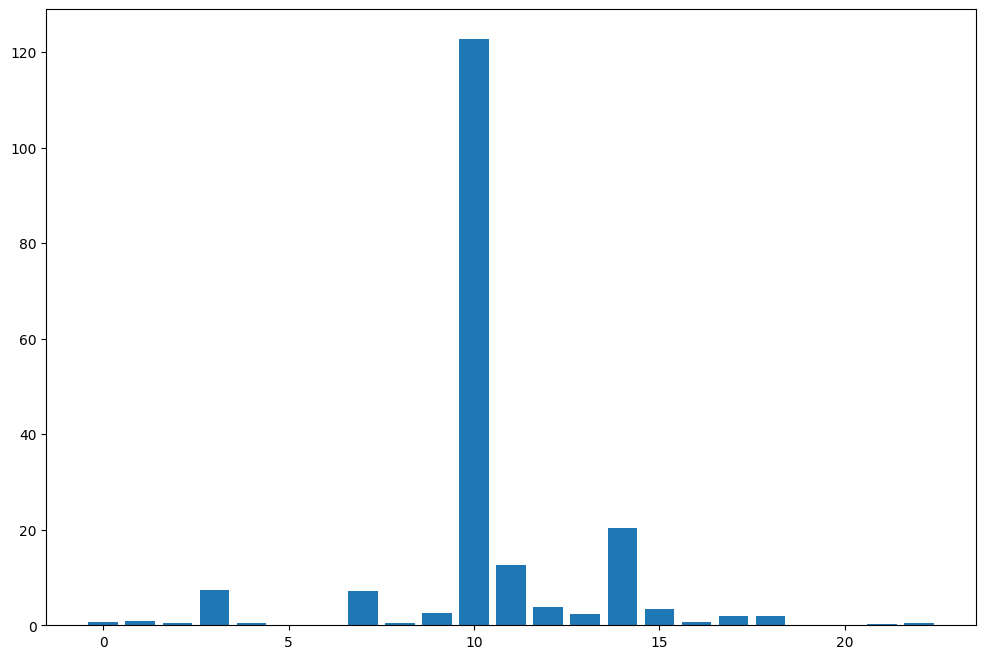

In [59]:
# Loop through feature scores and p-values to identify significant features
for i in range(len(fs.scores_)):
    if (fs.scores_[i] > 0) and (fs.pvalues_[i] < 0.05):
        print('Feature %d: %f (p-value: %f)' % (i, fs.scores_[i], fs.pvalues_[i]))

# Create a bar plot to visualize feature scores
plt.figure(figsize=(12, 8))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [60]:
# List of selected categorical features
selected_cate = ['umbrella_limit', 'insured_hobbies',  'incident_severity',  'incident_hour_of_the_day']

In [61]:
# Concatenate selected numerical and categorical features into a new DataFrame
final_df = pd.concat([data[num_features], data[selected_cate]], axis=1)

# Check the shape of the final DataFrame
final_df.shape

(1000, 12)

In [62]:
# Convert the DataFrame to a NumPy array
array = data.values

# Separate the input features (X) and the target labels (y)
X = array[:, :-1]  # Input features
y = array[:, -1]   # Target labels

# Define the validation size (test_size) and random seed
validation_size = 0.20  # 20% of the data will be used for testing
seed = 7  # Random seed for reproducibility

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [63]:
# Define the number of folds for cross-validation
num_folds = 10

# Define the random seed for reproducibility
seed = 7

In [64]:
# Initialize an empty list to store machine learning pipelines
pipelines = []

In [65]:
# Define and create machine learning pipelines for various algorithms
# Each pipeline consists of data scaling (StandardScaler) and a specific machine learning algorithm
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

# Initialize lists to store results, algorithm names, and scores
results = []
names = []
scores = ["accuracy", "roc_auc", "precision", "recall", "f1_micro"]

In [66]:
# Loop through the specified evaluation metrics (scores)
for score in scores:
    print(score)
    
    # Loop through each machine learning pipeline (name, model)
    for name, model in pipelines:
        # Create a KFold cross-validation iterator
        kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
        
        # Perform cross-validation and obtain the results
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=score)
        
        # Append the results and algorithm names to their respective lists
        results.append(cv_results)
        names.append(name)
        
        # Print the mean and standard deviation of the evaluation metric
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

accuracy
ScaledLR: 0.777500 (0.059372)
ScaledLDA: 0.780000 (0.067823)
ScaledKNN: 0.737500 (0.058896)
ScaledCART: 0.780000 (0.037997)
ScaledNB: 0.703750 (0.057568)
ScaledSVM: 0.755000 (0.045826)
roc_auc
ScaledLR: 0.751996 (0.083350)
ScaledLDA: 0.748136 (0.087007)
ScaledKNN: 0.581600 (0.064433)
ScaledCART: 0.686345 (0.028509)
ScaledNB: 0.718612 (0.063356)
ScaledSVM: 0.713253 (0.084355)
precision
ScaledLR: 0.576668 (0.093725)
ScaledLDA: 0.603382 (0.122292)
ScaledKNN: 0.429365 (0.165373)
ScaledCART: 0.537331 (0.084734)
ScaledNB: 0.429992 (0.064454)


/home/sahil/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sahil/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sahil/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ScaledSVM: 0.378333 (0.321286)
recall
ScaledLR: 0.338735 (0.126604)
ScaledLDA: 0.337865 (0.130471)
ScaledKNN: 0.139655 (0.047695)
ScaledCART: 0.531937 (0.087635)
ScaledNB: 0.604283 (0.091930)
ScaledSVM: 0.047611 (0.037254)
f1_micro
ScaledLR: 0.777500 (0.059372)
ScaledLDA: 0.780000 (0.067823)
ScaledKNN: 0.737500 (0.058896)
ScaledCART: 0.770000 (0.037583)
ScaledNB: 0.703750 (0.057568)
ScaledSVM: 0.755000 (0.045826)


In [67]:
## As Logistic Regression gave more roc_auc score, selecting this algorithm for final modelling
# Standardize the input features using StandardScaler
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(rescaledX, y_train)

# Standardize the validation (test) data
rescaledValidationX = scaler.transform(X_test)

# Make predictions on the validation data
predictions = model.predict(rescaledValidationX)

# Evaluate the model's performance
print("Accuracy: %.3f" % accuracy_score(y_test, predictions))
print("ROC_AUC: %.3f" % roc_auc_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.760
ROC_AUC: 0.613
[[136  13]
 [ 35  16]]
              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85       149
         1.0       0.55      0.31      0.40        51

    accuracy                           0.76       200
   macro avg       0.67      0.61      0.62       200
weighted avg       0.73      0.76      0.74       200

